In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sqlalchemy
from sqlalchemy import create_engine
from dotenv import load_dotenv
#pd.set_option('display.max_rows', 1000)

In [2]:
dotenv_local_path = './.env'
load_dotenv(dotenv_path=dotenv_local_path, verbose=True) 

True

In [3]:
%load_ext dotenv
%dotenv

cannot find .env file


In [4]:
# Connect to SQL

#engine = create_engine('mysql+pymysql://' + os.environ.get("MYSQL_USER") + ":" + os.environ.get("MYSQL_PASSWORD") + '@localhost:3306/amazon')
engine = create_engine("postgres://" + os.environ.get("AWS_POSTGRES_USER") + ":" + os.environ.get("AWS_POSTGRES_PASSWORD") + "@" + "amazon.coqoinqxklrf.us-east-1.rds.amazonaws.com:5432/postgres")

In [5]:
# Create df from SQL

df = pd.read_sql("SELECT * FROM amazon.purchases_aws", con=engine, parse_dates = ['OrderDate', 'ShipDate'])
df

,OrderID,OrderDate,Category,Condition,Seller,ListPricePerUnit,PurchasePricePerUnit,Quantity,ShipDate,Carrier,ItemSubtotal,Tax,ItemTotal,OrderYear,OrderMonth,OrderDay,OrderDayIndex,OrderDayName
0,1,2008-02-19,BOOKS,unknown,Amazon,29.99,19.79,1,2008-02-25,USPS,19.79,0.00,19.79,2008,2,19,1,Tuesday
1,2,2008-02-19,BOOKS,unknown,Amazon,27.95,18.45,1,2008-02-25,USPS,18.45,0.00,18.45,2008,2,19,1,Tuesday
2,3,2008-06-03,BOOKS,unknown,Amazon,34.99,23.09,1,2008-06-04,UPS,23.09,0.00,23.09,2008,6,3,1,Tuesday
3,4,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,6.99,9.39,1,2008-11-07,USPS,9.39,0.00,9.39,2008,11,6,3,Thursday
4,5,2008-11-06,HEALTH_BEAUTY,unknown,ThirdParty,10.99,7.99,1,2008-11-07,USPS,7.99,0.00,7.99,2008,11,6,3,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776,970,2019-12-14,COMPUTER,new,Amazon,44.99,21.88,1,2019-12-15,USPS,21.88,1.45,23.33,2019,12,14,5,Saturday
777,971,2019-12-18,OTHER,new,ThirdParty,19.99,13.99,1,2019-12-19,AMZN,13.99,0.93,14.92,2019,12,18,2,Wednesday
778,972,2019-12-18,OTHER,new,ThirdParty,27.00,12.99,1,2019-12-19,AMZN,12.99,0.86,13.85,2019,12,18,2,Wednesday
779,973,2019-12-19,GIFT_CARD,new,Amazon,50.00,200.00,1,2019-12-19,Other,200.00,0.00,200.00,2019,12,19,3,Thursday


# Data Analysis

In [6]:
# Cumulative total spent from 2008-2019, inclusive

TotalSpent = df['ItemTotal'].sum()
TotalSpent

30357.41

In [7]:
# Total number of transactions

NumTrans = len(df['ItemTotal'])
NumTrans

781

In [8]:
# Average spent

AvgSpent = TotalSpent/NumTrans
AvgSpent

38.86992317541613

In [9]:
# Use groupby to sum purchases by date

df_DateTotal = df[['OrderDate', 'ItemTotal']]
df_DateTotal = df_DateTotal.groupby('OrderDate')
df_DateTotal = df_DateTotal.sum('ItemTotal')
df_DateTotal

,ItemTotal
OrderDate,
2008-02-19,38.24
2008-06-03,23.09
2008-11-06,29.86
2008-12-13,25.90
2009-07-18,26.97
...,...
2019-12-13,23.45
2019-12-14,23.33
2019-12-18,28.77


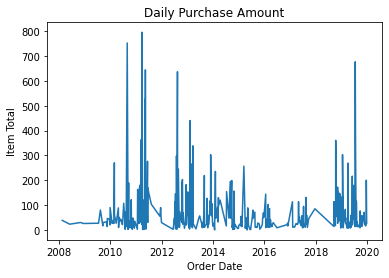

In [10]:
# Plot OrderDate & sum of purchases by date

fig, ax = plt.subplots()
ax.plot(df_DateTotal.index, df_DateTotal.values)
ax.set_xlabel('Order Date')
ax.set_ylabel('Item Total')
ax.set_title('Daily Purchase Amount')
plt.show()
#ax.figure.savefig('./img/DailyPurchaseAmount.png', bbox_inches='tight', dpi=150)

In [11]:
# Use groupby to sum taxes by date

df_DateTax = df[['OrderDate', 'Tax']]
df_DateTax = df_DateTax.groupby('OrderDate')
df_DateTax = df_DateTax.sum('Tax')
df_DateTax

,Tax
OrderDate,
2008-02-19,0.00
2008-06-03,0.00
2008-11-06,0.00
2008-12-13,0.00
2009-07-18,0.00
...,...
2019-12-13,1.46
2019-12-14,1.45
2019-12-18,1.79


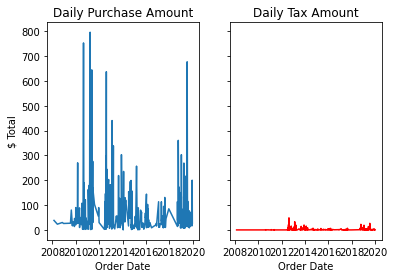

In [12]:
# Plot OrderDate and ItemTotal and OrderDate and PurchasePricePerUnit

fig, ax = plt.subplots(1,2, sharey = True)

ax[0].plot(df_DateTotal.index, df_DateTotal.values)
ax[1].plot(df_DateTax.index, df_DateTax.values, color = 'r')

ax[0].set_xlabel('Order Date')
ax[0].set_ylabel('$ Total')
ax[1].set_xlabel('Order Date')

ax[0].set_title('Daily Purchase Amount')
ax[1].set_title('Daily Tax Amount')

plt.show()

In [13]:
# The previous graphs contained too much data since they were being plotted for each day. 
# Grouping will allow the information to be more legible.

# Purchases by Year 

df_OrderYear = df[['OrderDate', 'ItemTotal', 'OrderYear']]
df_OrderYear = df_OrderYear.sort_values('OrderDate')
df_OrderYear = df_OrderYear.groupby('OrderYear')
df_OrderYear = df_OrderYear['ItemTotal'].sum()
print(df_OrderYear)

OrderYear
2008     117.09
2009     456.85
2010    2421.77
2011    7176.93
2012    3651.85
2013    3689.19
2014    2075.99
2015    1257.52
2016     823.48
2017    1392.77
2018    2689.12
2019    4604.85
Name: ItemTotal, dtype: float64


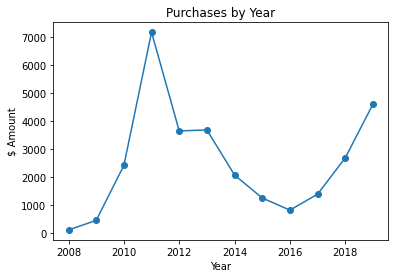

In [14]:
fig,ax = plt.subplots()
ax.plot(df_OrderYear.index, df_OrderYear.values, marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.show()

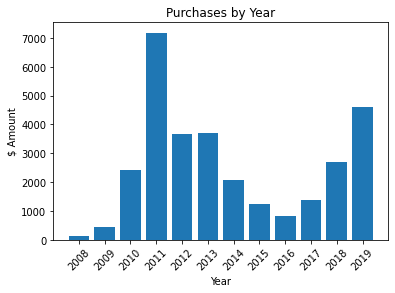

In [15]:
fig,ax = plt.subplots()
ax.bar(df_OrderYear.index, df_OrderYear.values)
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Year')
plt.xticks([x for x in df_OrderYear.index], rotation = 45)
plt.show()
#ax.figure.savefig('./img/PurchasesByYear.png', bbox_inches='tight', dpi=150)

In [16]:
# Purchases by Month

df_OrderMonth = df[['OrderDate', 'ItemTotal', 'OrderMonth']]
df_OrderMonth = df_OrderMonth.sort_values('OrderDate')
df_OrderMonth = df_OrderMonth.groupby('OrderMonth')
df_OrderMonth = df_OrderMonth['ItemTotal'].sum()
df_OrderMonth

OrderMonth
1     1435.93
2     3082.08
3     4439.17
4     1497.22
5     2198.31
6     2042.64
7     3352.54
8     3507.65
9     1887.06
10    2392.95
11    2187.99
12    2333.87
Name: ItemTotal, dtype: float64

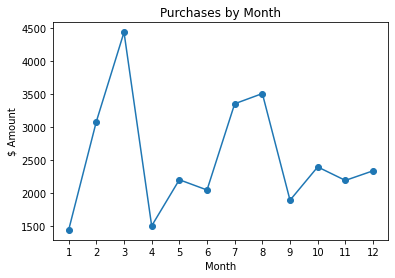

In [17]:
fig, ax = plt.subplots()
ax.plot(df_OrderMonth.index, df_OrderMonth.values, marker = 'o')
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()

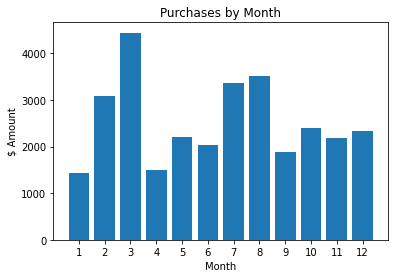

In [18]:
fig, ax = plt.subplots()
ax.bar(df_OrderMonth.index, df_OrderMonth.values)
ax.set_xlabel('Month')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Month')
plt.xticks([x for x in df_OrderMonth.index])
plt.show()
#ax.figure.savefig('./img/PurchasesByMonth.png', bbox_inches='tight', dpi=150)

In [19]:
# Transactions by Year

df_TransYear = df[['OrderDate', 'ItemTotal', 'OrderYear']]
df_TransYear = df_TransYear.groupby('OrderYear')
df_TransYear = df_TransYear['ItemTotal'].size()
df_TransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
Name: ItemTotal, dtype: int64

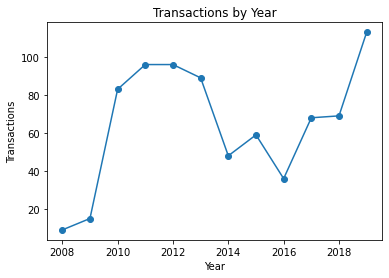

In [20]:
fig,ax = plt.subplots()
ax.plot(df_TransYear.index, df_TransYear.values, marker = 'o')
ax.set_xlabel('Year')
ax.set_ylabel('Transactions')
ax.set_title('Transactions by Year')
plt.show()
#ax.figure.savefig('./img/TransactionsByYear.png', bbox_inches='tight', dpi=150)

In [21]:
# Transactions by Seller

df_TransSeller = df[['Seller']]
df_TransSeller = df_TransSeller.groupby(df_TransSeller['Seller'] == 'Amazon')
df_TransSeller = df_TransSeller.size()
df_TransSeller

Seller
False    329
True     452
dtype: int64

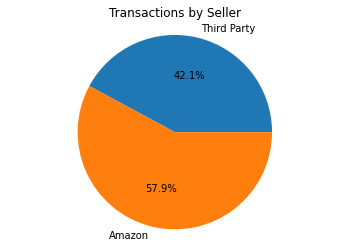

In [22]:
fig,ax = plt.subplots()
ax.pie(df_TransSeller.values, labels = ['Third Party', 'Amazon'], autopct = '%1.1f%%')
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()

<ipython-input-23-b795d8081a5c>:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


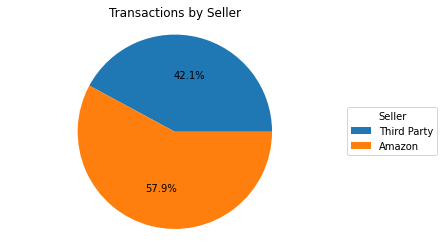

In [23]:
fig, ax = plt.subplots()
ax.pie(df_TransSeller.values, autopct = '%1.1f%%')
ax.legend(
    df_TransSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)
)
ax.set_title('Transactions by Seller')
ax.axis('equal')
plt.show()
#ax.figure.savefig('./img/TransactionsBySeller.png', bbox_inches='tight', dpi=150)

In [24]:
# Purchases by Seller

df_PurchasesSeller = df[['Seller', 'ItemTotal']]
df_PurchasesSeller = df_PurchasesSeller.groupby(df_PurchasesSeller['Seller'] == 'Amazon')
df_PurchasesSeller = df_PurchasesSeller['ItemTotal'].sum()
df_PurchasesSeller

Seller
False     7575.08
True     22782.33
Name: ItemTotal, dtype: float64

<ipython-input-25-ca4d37f56fb3>:3: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


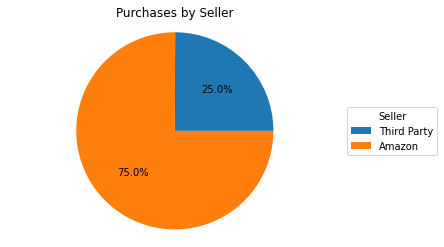

In [25]:
fig,ax = plt.subplots()
ax.pie(df_PurchasesSeller.values, autopct = '%1.1f%%')
ax.legend(
    df_PurchasesSeller.index,
    title = 'Seller',
    labels = ['Third Party', 'Amazon'],
    loc = 'center left',
    bbox_to_anchor = (1,0,0.5,1)    
)
ax.set_title('Purchases by Seller')
ax.axis('equal')
plt.show()
#ax.figure.savefig('./img/PurchasesBySeller.png', bbox_inches='tight', dpi=150)

In [26]:
# Purchases by Category
# Note: it is necessary to sort by reverse in the df so the plot can be arranged alphabetically
# from top to bottom

df_CategoryTotal = df[['Category', 'ItemTotal']]
df_CategoryTotal = df_CategoryTotal.groupby('Category')
df_CategoryTotal = df_CategoryTotal['ItemTotal'].sum()
df_CategoryTotal = df_CategoryTotal.sort_index(ascending = False)
df_CategoryTotal

Category
UNKNOWN            2092.30
TOOLS               533.80
SPORTS_OUTDOOR      831.09
OTHER               842.15
OFFICE              504.44
HOME               2215.82
HEALTH_BEAUTY      3059.04
GROCERY             481.91
GIFT_CARD           638.92
ENTERTAINMENT        61.16
ELECTRONICS        4208.20
COMPUTER          10519.35
BOOKS              1519.07
APPAREL            2850.16
Name: ItemTotal, dtype: float64

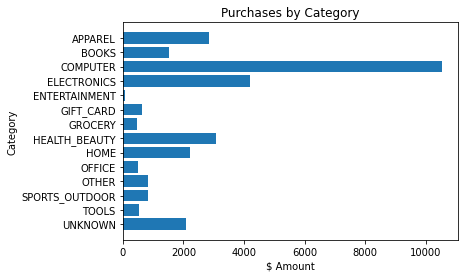

In [27]:
# Plot purchases by category

fig,ax = plt.subplots()
ax.barh(df_CategoryTotal.index, df_CategoryTotal.values)
ax.set_xlabel('$ Amount')
ax.set_ylabel('Category')
ax.set_title('Purchases by Category')
plt.show()
#ax.figure.savefig('./img/PurchasesByCategory.png', bbox_inches='tight', dpi=150)

In [28]:
# Purchases by category share

df_CategoryShare = df[['Category', 'ItemTotal']]
df_CategoryShare = df_CategoryShare.groupby('Category', as_index = False)
df_CategoryShare = df_CategoryShare['ItemTotal'].sum()
df_CategoryShare['Share'] = df_CategoryShare['ItemTotal'].div(df_CategoryShare['ItemTotal'].sum())*100
df_CategoryShare = df_CategoryShare.sort_values('Category', ascending = False)
df_CategoryShare

,Category,ItemTotal,Share
13,UNKNOWN,2092.30,6.892222
12,TOOLS,533.80,1.758385
11,SPORTS_OUTDOOR,831.09,2.737684
10,OTHER,842.15,2.774117
9,OFFICE,504.44,1.661670
8,HOME,2215.82,7.299108
7,HEALTH_BEAUTY,3059.04,10.076749
6,GROCERY,481.91,1.587454
5,GIFT_CARD,638.92,2.104659
4,ENTERTAINMENT,61.16,0.201466


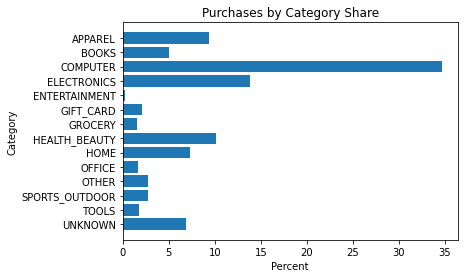

In [29]:
# Plot purchases by category share

fig,ax = plt.subplots()
ax.barh(df_CategoryShare['Category'],df_CategoryShare['Share'])
ax.set_xlabel('Percent')
ax.set_ylabel('Category')
ax.set_title('Purchases by Category Share')
plt.show()
#ax.figure.savefig('./img/PurchasesByCategoryShare.png', bbox_inches='tight', dpi=150)

In [30]:
# Purchases by day of week

df_DayPur = df[['OrderDayIndex','OrderDayName','ItemTotal']]
df_DayPur = df_DayPur.groupby(['OrderDayName','OrderDayIndex'], as_index = False)
df_DayPur = df_DayPur['ItemTotal'].sum()
df_DayPur = df_DayPur.sort_values('OrderDayIndex')
df_DayPur

,OrderDayName,OrderDayIndex,ItemTotal
1,Monday,0,6787.06
5,Tuesday,1,4378.23
6,Wednesday,2,3476.16
4,Thursday,3,4260.84
0,Friday,4,4073.42
2,Saturday,5,2965.26
3,Sunday,6,4416.44


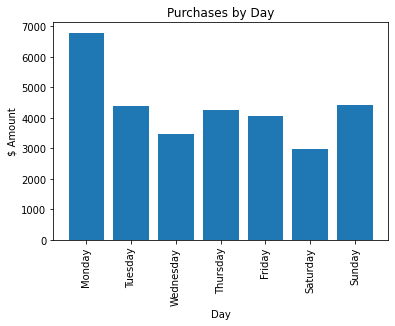

In [31]:
# Plot purchases by day of week

fig,ax = plt.subplots()
ax.bar(df_DayPur['OrderDayName'],df_DayPur['ItemTotal'])
ax.set_xlabel('Day')
ax.set_ylabel('$ Amount')
ax.set_title('Purchases by Day')
plt.xticks(rotation = 90)
plt.show()
#ax.figure.savefig('./img/PurchasesByDay.png', bbox_inches='tight', dpi=150)

In [32]:
# Avg transaction value by year

df_YearAvgTrans = df[['OrderYear','ItemTotal']]
df_YearAvgTrans = df_YearAvgTrans.groupby(['OrderYear'], as_index = False)
df_YearAvgTrans = df_YearAvgTrans['ItemTotal'].sum()
df_YearAvgTrans

,OrderYear,ItemTotal
0,2008,117.09
1,2009,456.85
2,2010,2421.77
3,2011,7176.93
4,2012,3651.85
5,2013,3689.19
6,2014,2075.99
7,2015,1257.52
8,2016,823.48
9,2017,1392.77


In [33]:
df_NumTransYear = df[['OrderYear', 'OrderID']].groupby('OrderYear').size()
df_NumTransYear

OrderYear
2008      9
2009     15
2010     83
2011     96
2012     96
2013     89
2014     48
2015     59
2016     36
2017     68
2018     69
2019    113
dtype: int64

In [34]:
df_YearAvgTrans['Trans'] = df_NumTransYear.values
df_YearAvgTrans

,OrderYear,ItemTotal,Trans
0,2008,117.09,9
1,2009,456.85,15
2,2010,2421.77,83
3,2011,7176.93,96
4,2012,3651.85,96
5,2013,3689.19,89
6,2014,2075.99,48
7,2015,1257.52,59
8,2016,823.48,36
9,2017,1392.77,68


In [35]:
df_YearAvgTrans['AvgPerTrans'] = df_YearAvgTrans['ItemTotal'].div(df_YearAvgTrans['Trans'])
df_YearAvgTrans

,OrderYear,ItemTotal,Trans,AvgPerTrans
0,2008,117.09,9,13.010000
1,2009,456.85,15,30.456667
2,2010,2421.77,83,29.177952
3,2011,7176.93,96,74.759687
4,2012,3651.85,96,38.040104
5,2013,3689.19,89,41.451573
6,2014,2075.99,48,43.249792
7,2015,1257.52,59,21.313898
8,2016,823.48,36,22.874444
9,2017,1392.77,68,20.481912


In [36]:
# All of the above can be done more quickly using the following:

#df_YearAvgTrans = df[['OrderYear','ItemTotal']]
#df_YearAvgTrans = df_YearAvgTrans.groupby(['OrderYear'], as_index = False)['ItemTotal'].sum()

#df_YearOrders = df[['OrderYear','ItemTotal']].groupby('OrderYear')['ItemTotal'].size()
#df_YearAvgTrans['Trans'] = df_YearOrders.values

#df_YearAvgTrans['AvgTrans'] = df_YearAvgTrans['ItemTotal'].div(df_YearAvgTrans['Trans'])
#df_YearAvgTrans

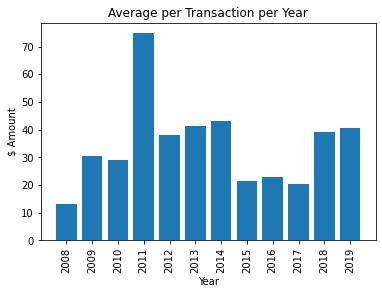

In [37]:
# Plot average per transaction by year

fig, ax = plt.subplots()
ax.bar(df_YearAvgTrans['OrderYear'],df_YearAvgTrans['AvgPerTrans'])
ax.set_xlabel('Year')
ax.set_ylabel('$ Amount')
ax.set_title('Average per Transaction per Year')
plt.xticks([x for x in df_YearAvgTrans['OrderYear']], rotation = 90)
plt.show()
#ax.figure.savefig('./img/AveragePerTransPerYear.png', bbox_inches='tight', dpi=150)

In [38]:
# Shipping method

df_Carriers = df['Carrier']
CarrierVC = df_Carriers.value_counts()
CarrierVC = CarrierVC.sort_index(ascending = False)
CarrierVC

USPS                    273
UPS Mail Innovations      5
UPS                     170
Other                    98
FedEx SmartPost           4
FedEx                    22
DHL                       9
AMZN                    200
Name: Carrier, dtype: int64

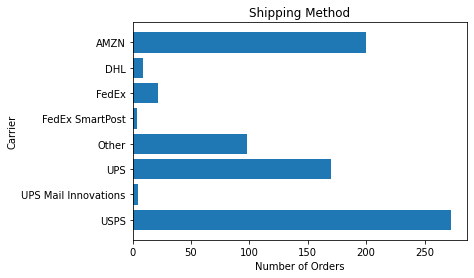

In [39]:
# Plot of shipping method

fig,ax = plt.subplots()
ax.barh(CarrierVC.index, CarrierVC.values)
ax.set_xlabel('Number of Orders')
ax.set_ylabel('Carrier')
ax.set_title('Shipping Method')
plt.show()
#ax.figure.savefig('./img/ShippingMethod.png', bbox_inches='tight', dpi=150)

In [40]:
# Shipping method and avg transaction cost

df_CarrierTotal = df[['Carrier', 'ItemTotal']]
df_CarrierTotal = df_CarrierTotal.groupby('Carrier', as_index = False)['ItemTotal'].sum()

df_CarrierTrans = df[['Carrier', 'ItemTotal']].groupby('Carrier')['ItemTotal'].size()
df_CarrierTotal['NumTrans'] = df_CarrierTrans.values

df_CarrierTotal['AvgPerTrans'] = df_CarrierTotal['ItemTotal'].div(df_CarrierTotal['NumTrans']).round(2)

df_CarrierTotal = df_CarrierTotal.sort_values('Carrier', ascending = False)
df_CarrierTotal

,Carrier,ItemTotal,NumTrans,AvgPerTrans
7,USPS,6594.03,273,24.15
6,UPS Mail Innovations,57.62,5,11.52
5,UPS,10874.11,170,63.97
4,Other,4113.09,98,41.97
3,FedEx SmartPost,100.26,4,25.06
2,FedEx,1948.20,22,88.55
1,DHL,89.71,9,9.97
0,AMZN,6580.39,200,32.90


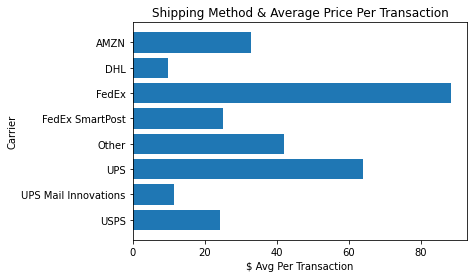

In [41]:
# Plot shipping method and avg transaction cost

fig,ax = plt.subplots()
ax.barh(df_CarrierTotal['Carrier'], df_CarrierTotal['AvgPerTrans'])
ax.set_xlabel('$ Avg Per Transaction')
ax.set_ylabel('Carrier')
ax.set_title('Shipping Method & Average Price Per Transaction')
plt.show()
#ax.figure.savefig('./img/ShippingMethodPrice.png', bbox_inches='tight', dpi=150)